# Laboratorio 7.1: Introducción a R y redes bayesianas

En el laboratorio aprenderemos a cargar una archivo desde google drive. A partir del dataframe generado se realizará algunos gráficos para entender el uso de algunas librerías básicas.

## A. Introducción

### 1. Montamos google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Cargamos librerías para poder ejecutar código Python y código en R

Para ejecutar código Python se utiliza las caja de códigos de siempre. En el caso de usar código R se debe colocar al comienzo de la caja de código %%R para indicar que el Kernel que se va a utilizar es para interpretar R.

In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### 2. Cargar datos desde un archivo en google drive

El primer ejercicio consiste en cargar la base de datos `iris.cvs` utilizada en clases.

In [14]:
%%R
# Cargar la base de datos
url <- ('/content/drive/My Drive/D-UCN/Classes/TecnicasAvanzadasAprendizajeAutomatico/Laboratorios/Laboratorio07:Redes Bayesianas/iris.csv')

dataset <- read.csv(url)

# Leer seis primeras filas del dataframe
#head(dataset)
# Leer las últimas seis filas del dataframe
#tail(dataset)
# Obtener el nombre de las columnas del dataframe
names(dataset)

[1] "sepal_length" "sepal_width"  "petal_length" "petal_width"  "species"     


In [15]:
%%R
# Resumen de las columnas en una tabla
summary(dataset)

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
            species  
 Iris-setosa    :50  
 Iris-versicolor:50  
 Iris-virginica :50  
                     
                     
                     


In [16]:
%%R
# Representación textual de un objeto
str(dataset)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


In [17]:
%%R
# Número de dimensiones del dataframe
dim(dataset)

[1] 150   5


In [18]:
%%R
# Número de columnas del dataframe
ncol(dataset)

[1] 5


In [19]:
%%R
# Número de filas del dataframe
nrow(dataset)

[1] 150


### Función tapply

Función que aplica una función de orden superior a un conjunto de datos.

In [20]:
%%R
tapply(dataset$sepal_length, dataset$species, mean)

    Iris-setosa Iris-versicolor  Iris-virginica 
          5.006           5.936           6.588 


### 3. Graficar los datos

Cargamos las librerías:

*   **foreign:**
*   **ggplot2:**
*   **psych:**



### Graficamos los datos 

Una operación útil es graficar un histograma

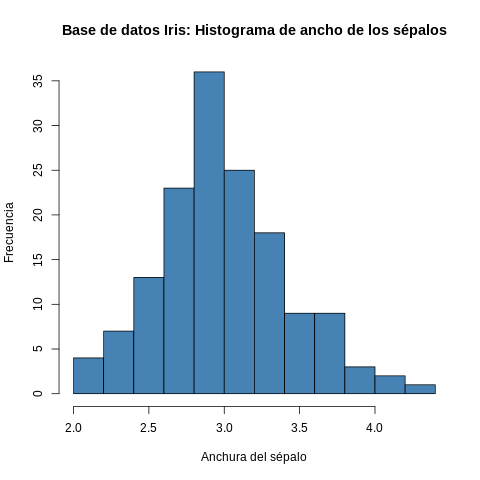

In [21]:
%%R
hist(dataset$sepal_width, main = 'Base de datos Iris: Histograma de ancho de los sépalos',
     xlab = 'Anchura del sépalo',
     ylab = 'Frecuencia',
     col = 'steelblue')

También graficar diagramas de dispersión (sepal_length vs sepal_width)

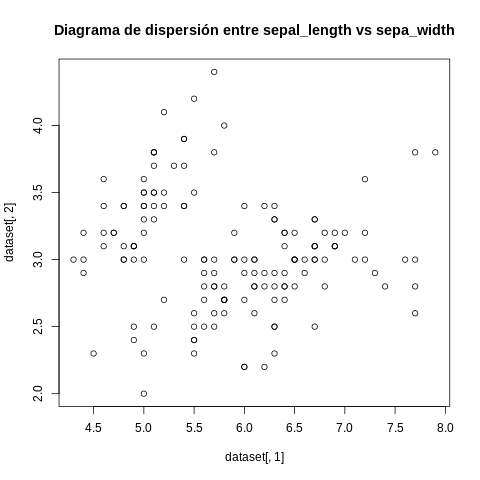

In [24]:
%%R
plot(dataset[, 1], dataset[, 2],
     main = 'Diagrama de dispersión entre sepal_length vs sepa_width')

Otra forma es indicando el nombre de la columna.

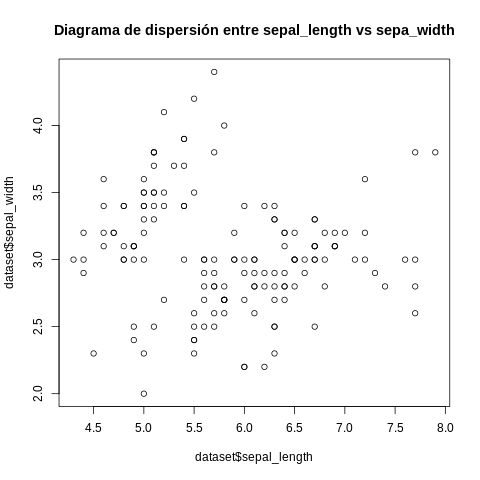

In [27]:
%%R
plot(dataset$sepal_length, dataset$sepal_width,
      main = 'Diagrama de dispersión entre sepal_length vs sepa_width')

Mostrar los nombres de las columnas del dataframe

In [28]:
%%R
names(dataset)

[1] "sepal_length" "sepal_width"  "petal_length" "petal_width"  "species"     


Mostrar matriz de dispersión

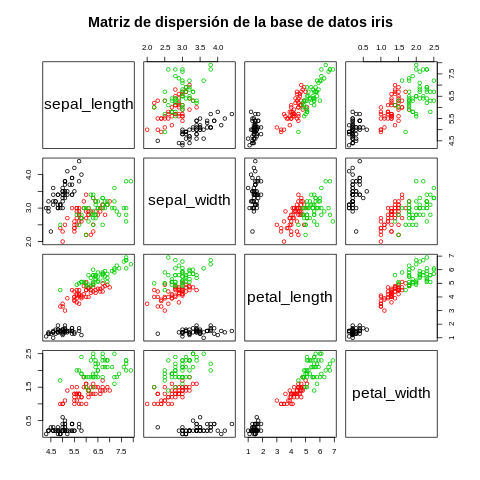

In [31]:
%%R
# variable dependiente ~ variable independiente...
pairs(sepal_length ~ sepal_width + petal_length + petal_width,
      data = dataset,
      col = dataset$species,
      main = "Matriz de dispersión de la base de datos iris")

Graficamos mostrando los colores por clase

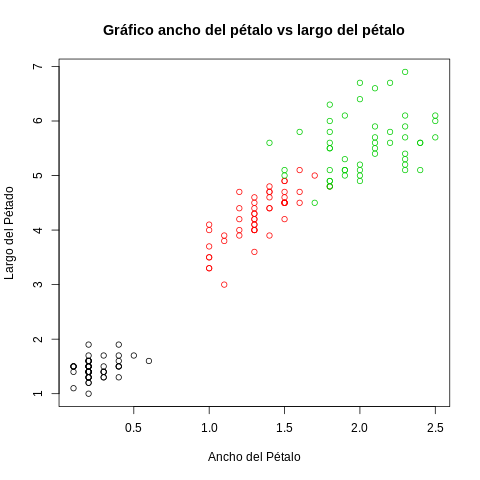

In [35]:
%%R
plot(dataset$petal_width, dataset$petal_length,
     col = dataset$species,
     xlab = "Ancho del Pétalo",
     ylab = "Largo del Pétado",
     main = "Gráfico ancho del pétalo vs largo del pétalo")

Calculamos una regresión lineal


Call:
lm(formula = petal_length ~ petal_width, data = dataset)

Coefficients:
(Intercept)  petal_width  
      1.091        2.226  



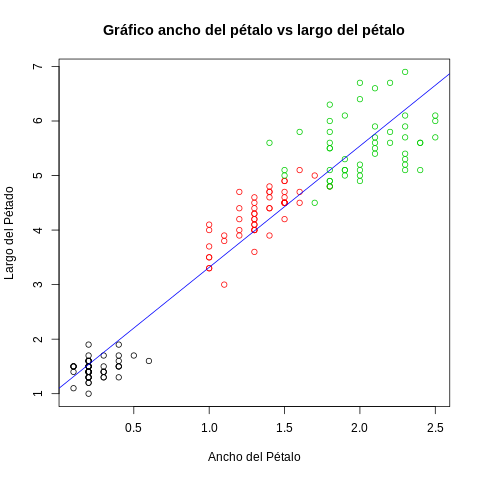

In [39]:
%%R
plot(dataset$petal_width,
     dataset$petal_length,
     col = dataset$species,
     xlab = "Ancho del Pétalo",
     ylab = "Largo del Pétado",
     main = "Gráfico ancho del pétalo vs largo del pétalo")

regresion <- lm(petal_length ~ petal_width, 
                data = dataset)

print(regresion)

abline(regresion,
       col = "blue")

## B. Redes Bayesianas

Revisaremos conceptos como:

*   Representación
*   Razonamiento
*   Inferencia
*   Aprendizaje
*   Clasificadores

### 1. Modelos de redes bayesianas

In [ ]:
%%R

# Cargamos libreria de redes bayesianas
install.packages("bnlearn")
library(bnlearn)

#### Creamos un grafo desde **cero**

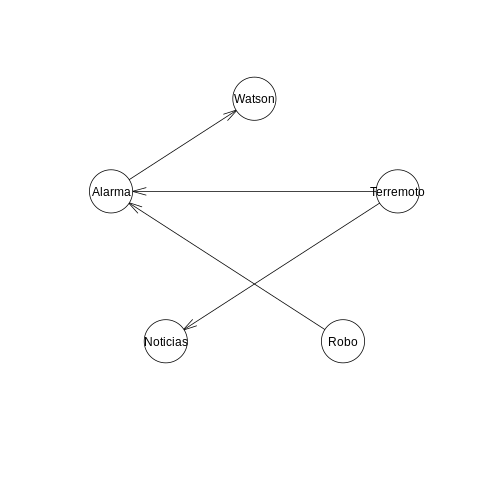

In [46]:
%%R 

# Creo un grafo como el visto en clases
rb.alarma <- model2network("[Robo][Terremoto][Alarma|Robo:Terremoto][Watson|Alarma][Noticias|Terremoto]") 
plot(rb.alarma)

#### Modificamos el grafo

*   Quitamos el arco entre el nodo "Terremoto" y "Noticias".
*   Cambiamos la dirección entre el arco "Alarma" y "Robo".
*   Agregarmos el archo entre "Terremoto" y "Robo".



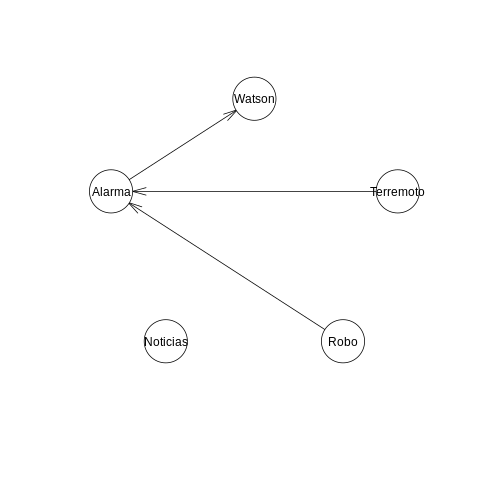

In [48]:
%%R

# Quitamos el arco entre el nodo "Terremoto" y "Noticias"
alarma.modificada <- drop.arc(rb.alarma, "Terremoto", "Noticias")
plot(alarma.modificada)

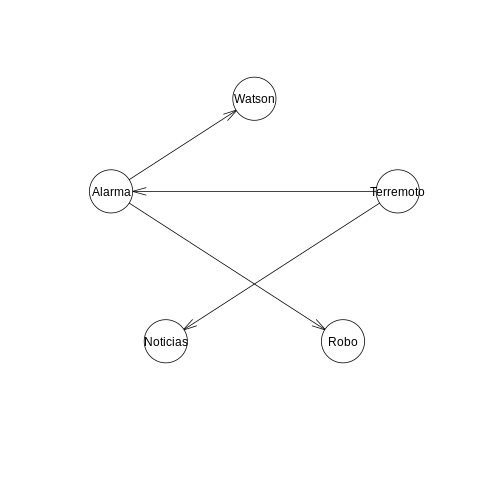

In [49]:
%%R

# Cambiamos la dirección entre el arco "Alarma" y "Robo".
alarma.modificada <- reverse.arc(rb.alarma, "Alarma", "Robo")
plot(alarma.modificada)

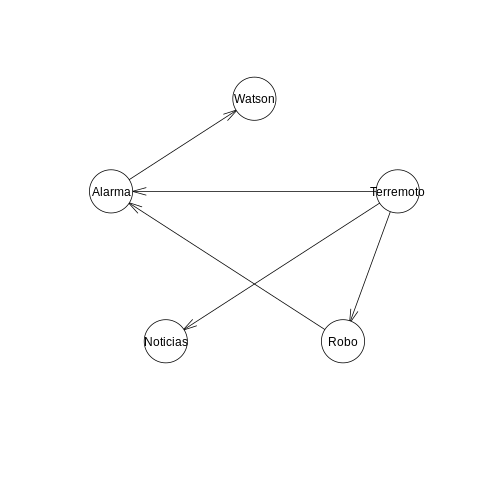

In [50]:
%%R

# Agregamos el arco entre "Terremoto" y "Robo".
alarma.modificada <- set.arc(rb.alarma, "Terremoto", "Robo")
plot(alarma.modificada)

#### Agregar un arco entre Watson y Terremoto

No se puede porque genera un ciclo (loop)

In [52]:
%%R

# Agregamos el arco entre "Watson" y "Terremoto".
alarma.modificada <- set.arc(rb.alarma, "Watson", "Terremoto")
plot(alarma.modificada)

R[write to console]: Error in arc.operations(x = x, from = from, to = to, op = "set", check.cycles = check.cycles,  : 
  the resulting graph contains cycles.
Calls: <Anonymous> ... <Anonymous> -> withVisible -> set.arc -> arc.operations




Error in arc.operations(x = x, from = from, to = to, op = "set", check.cycles = check.cycles,  : 
  the resulting graph contains cycles.
Calls: <Anonymous> ... <Anonymous> -> withVisible -> set.arc -> arc.operations


#### Imprimimos el grafo para ver información

En algunas ocasiones el grafo es demasiado grande y es conveniente imprimir el modelo en formato de *string*.

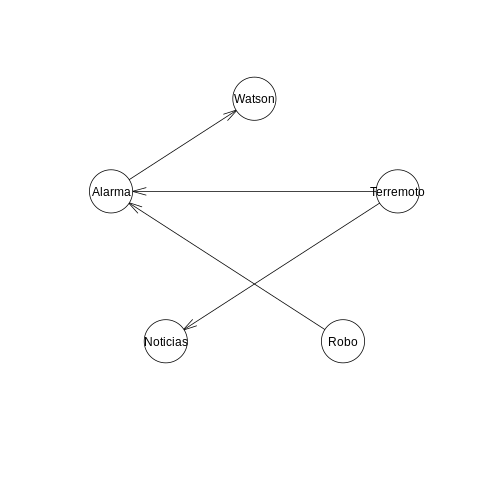

In [62]:
%%R
rb.alarma
plot(rb.alarma)

#### Preguntas sobre los nodos en el grafo

Nodos cercanos (vecinos)

In [63]:
%%R
nbr(rb.alarma, node="Alarma")

[1] "Robo"      "Terremoto" "Watson"   


Nodos padres

In [64]:
%%R
parents(rb.alarma, node="Alarma")

[1] "Robo"      "Terremoto"


Nodos hijos

In [65]:
%%R
children(rb.alarma, node="Alarma")

[1] "Watson"


Manto de Markov

In [67]:
%%R
mb(rb.alarma, node="Alarma")

[1] "Robo"      "Terremoto" "Watson"   


#### Arcos

In [68]:
%%R
arcs(rb.alarma)

     from        to        
[1,] "Robo"      "Alarma"  
[2,] "Terremoto" "Alarma"  
[3,] "Alarma"    "Watson"  
[4,] "Terremoto" "Noticias"


#### Destacando nodos y arcos

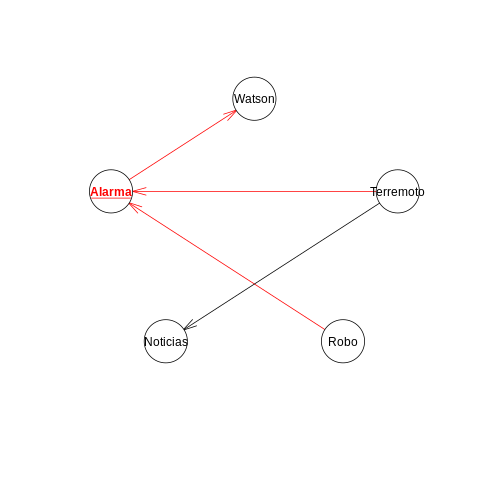

In [69]:
%%R
plot(rb.alarma, highlight = list(nodes='Alarma'))

#### Cargar la red bayesiana especificando las TPC

In [73]:
%%R

yn <- c("yes", "no")
R <- array(dimnames = list(Robo = yn), dim = 2, c(0.30, 0.70))
T <- array(dimnames = list(Terremoto = yn), dim=2, c(0.35, 0.65))
A <- array(dimnames = list(Alarma = yn, Terremoto = yn, Robo = yn), 
           dim = c(2, 2, 2), 
           c(0.95,0.05,0.90,0.10,0.60,0.40,0.01,0.99))
W <- array(dimnames = list(Watson = yn, Alarma = yn),
           dim = c(2, 2),
           c(0.80,0.20,0.40,0.60))
N <- array(dimnames = list(Noticias = yn, Terremoto = yn),
           dim = c(2, 2),
           c(0.60,0.40,0.01,0.99))
cpts <- list(Robo = R, Terremoto = T, Alarma = A, Watson = W, Noticias = N)
rb.alarma.fit <- custom.fit(rb.alarma, cpts)

rb.alarma.fit$Terremoto


  Parameters of node Terremoto (multinomial distribution)

Conditional probability table:
 Terremoto
 yes   no 
0.35 0.65 


R[write to console]: Loading required namespace: lattice



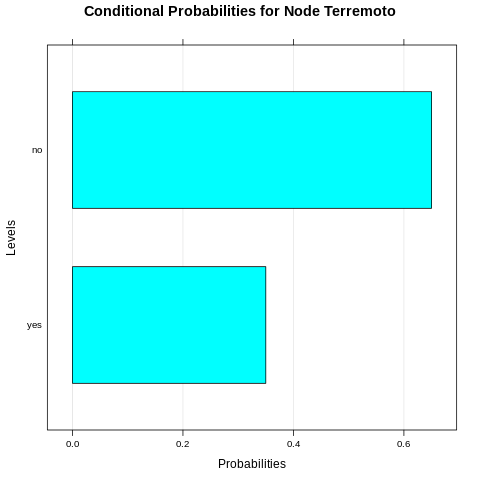

In [74]:
%%R

bn.fit.barchart(rb.alarma.fit$Terremoto)

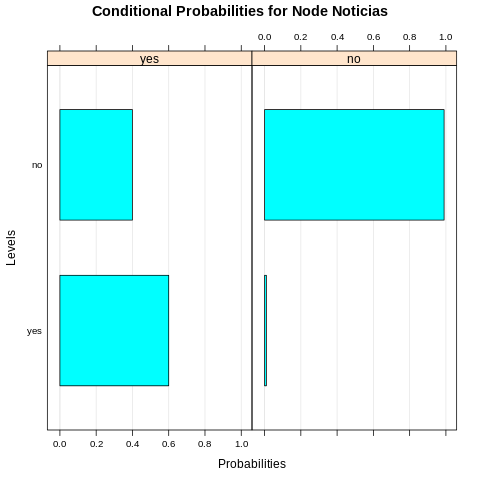

In [75]:
%%R

bn.fit.barchart(rb.alarma.fit$Noticias)

In [77]:
%%R
rb.alarma.fit$Noticias


  Parameters of node Noticias (multinomial distribution)

Conditional probability table:
 
        Terremoto
Noticias  yes   no
     yes 0.60 0.01
     no  0.40 0.99


In [78]:
%%R
rb.alarma.fit$Alarma


  Parameters of node Alarma (multinomial distribution)

Conditional probability table:
 
, , Terremoto = yes

      Robo
Alarma  yes   no
   yes 0.95 0.60
   no  0.05 0.40

, , Terremoto = no

      Robo
Alarma  yes   no
   yes 0.90 0.01
   no  0.10 0.99



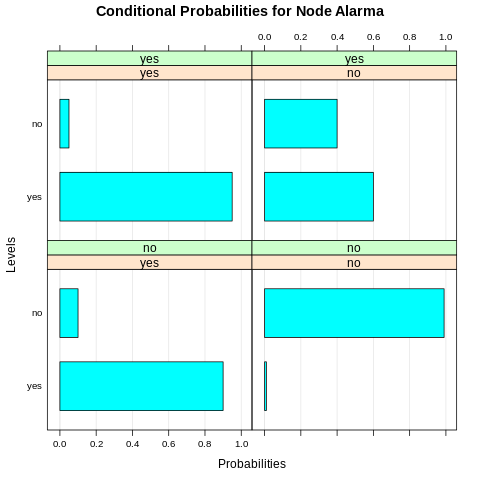

In [79]:
%%R
bn.fit.barchart(rb.alarma.fit$Alarma)